<a href="https://colab.research.google.com/github/dimple-abirami/ML/blob/main/Boston_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/HousePricePrediction.csv")

In [4]:
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

num_cols = df.select_dtypes(include=np.number)
z_scores = np.abs((num_cols - num_cols.mean()) / num_cols.std())
outlier_mask = (z_scores < 3).all(axis=1)
df_cleaned = df[outlier_mask]

In [5]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [6]:
X = pd.get_dummies(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [11]:
mbs = mean_absolute_percentage_error(y_test, y_pred)
print("mean_absolute_percentage_error: ", mbs)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

mean_absolute_percentage_error:  0.1978186026868606
Root Mean Squared Error: 54013.839479256734
R-squared Score: 0.6196387511450022


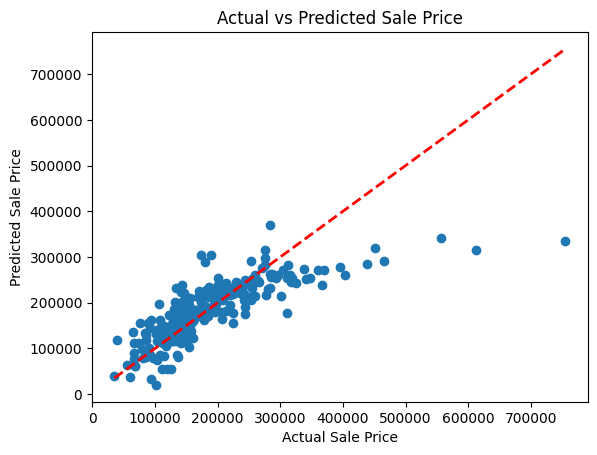

In [12]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Linear regression line
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.show()